#📌 Extracción

In [5]:
import requests
import pandas as pd
import os


github_api_url = "https://github.com/ingridcristh/challenge2-data-science-LATAM/blob/main/TelecomX_Data.json"

raw_github_url = github_api_url.replace("github.com", "raw.githubusercontent.com").replace("/blob/", "/")

response = requests.get(raw_github_url)
response.raise_for_status()

df = pd.read_json(response.text)
display(df.head())

/tmp/ipython-input-5-735647173.py:17: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_json(response.text)


,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [6]:
df.columns

Index(['customerID', 'Churn', 'customer', 'phone', 'internet', 'account'], dtype='object')

In [10]:
datos_customer = pd.json_normalize(df['customer'])
datos_phone = pd.json_normalize(df['phone'])
datos_internet = pd.json_normalize(df['internet'])
datos_account = pd.json_normalize(df['account'])
df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [12]:
columnas = list(df.columns)
columnas

['customerID', 'Churn', 'customer', 'phone', 'internet', 'account']

In [16]:
df_combined = pd.concat([df[['customerID', 'Churn']], datos_customer, datos_phone, datos_internet, datos_account], axis=1)
display(df_combined.head())

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [21]:
datos = df_combined

datos.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [22]:
import pandas as pd

datos.info()

print(datos.isnull().sum())

print(datos.duplicated().sum())

print(datos.describe())

print(datos['gender'].value_counts())

print(datos['Churn'].value_counts())

datos.shape

Información del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract       

(7267, 21)

In [25]:
datos['Cuentas_Diarias'] = datos['Charges.Monthly'] / 30
datos.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas_Diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3,2.186667
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4,1.996667
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4,2.796667


In [26]:
columnas_binarias = ['Partner', 'Dependents', 'PhoneService', 'MultipleLines',
                     'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
                     'StreamingTV', 'StreamingMovies', 'PaperlessBilling']

for col in columnas_binarias:
    if col in datos.columns:
        datos[col] = datos[col].replace({'Yes': 1, 'No': 0})

if 'Churn' in datos.columns:
    datos['Churn'] = datos['Churn'].replace({'Yes': 1, 'No': 0})


if 'gender' in datos.columns:
    datos['gender'] = datos['gender'].replace({'Female': 1, 'Male': 0})


print("\nDataFrame después de convertir valores textuales a binarios:")
display(datos.head())


print("\nTipos de datos después de la transformación:")
print(datos[columnas_binarias + ['Churn', 'gender']].dtypes)


DataFrame después de convertir valores textuales a binarios:


,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas_Diarias
0,0002-ORFBO,0,1,0,1,1,9,1,0,DSL,...,0,1,1,0,One year,1,Mailed check,65.6,593.3,2.186667
1,0003-MKNFE,0,0,0,0,0,9,1,1,DSL,...,0,0,0,1,Month-to-month,0,Mailed check,59.9,542.4,1.996667
2,0004-TLHLJ,1,0,0,0,0,4,1,0,Fiber optic,...,1,0,0,0,Month-to-month,1,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,1,0,1,1,0,13,1,0,Fiber optic,...,1,0,1,1,Month-to-month,1,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,1,1,1,1,0,3,1,0,Fiber optic,...,0,1,1,0,Month-to-month,1,Mailed check,83.9,267.4,2.796667



Tipos de datos después de la transformación:
Partner              int64
Dependents           int64
PhoneService         int64
MultipleLines       object
OnlineSecurity      object
OnlineBackup        object
DeviceProtection    object
TechSupport         object
StreamingTV         object
StreamingMovies     object
PaperlessBilling     int64
Churn               object
gender               int64
dtype: object


#📊 Carga y análisis

In [28]:
datos.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,Charges.Monthly,Cuentas_Diarias
count,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000
mean,0.494289,0.162653,0.484106,0.300124,32.346498,0.902711,0.593230,64.720098,2.157337
std,0.500002,0.369074,0.499782,0.458343,24.571773,0.296371,0.491265,30.129572,1.004319
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.608333
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,35.425000,1.180833
50%,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,70.300000,2.343333
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,89.875000,2.995833
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,118.750000,3.958333


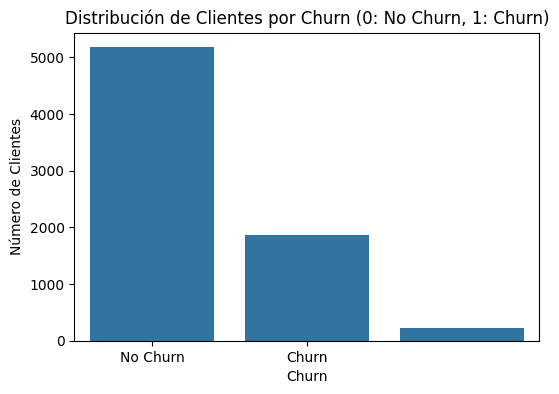

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

churn_counts = datos['Churn'].value_counts()

plt.figure(figsize=(6, 4))
sns.countplot(x='Churn', data=datos)
plt.title('Distribución de Clientes por Churn (0: No Churn, 1: Churn)')
plt.xlabel('Churn')
plt.ylabel('Número de Clientes')
plt.xticks([0, 1], ['No Churn', 'Churn'])
plt.show()

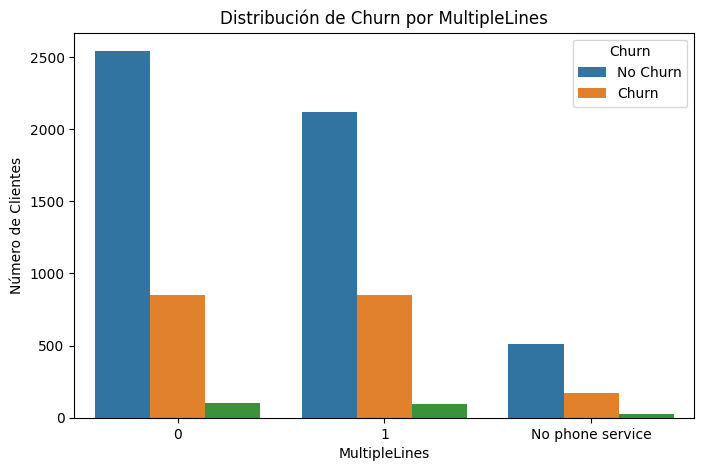

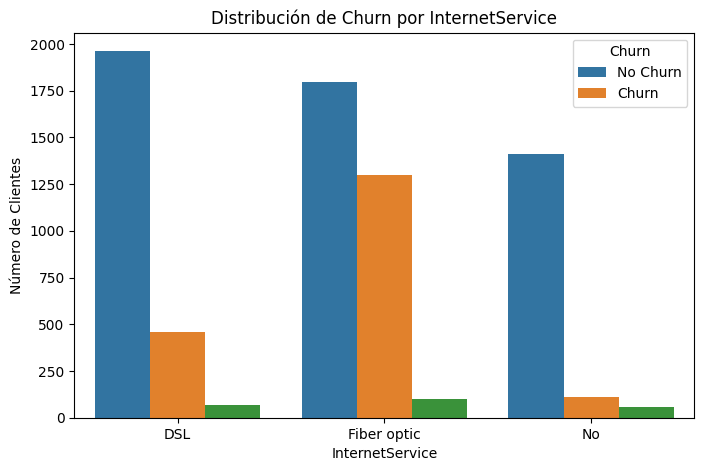

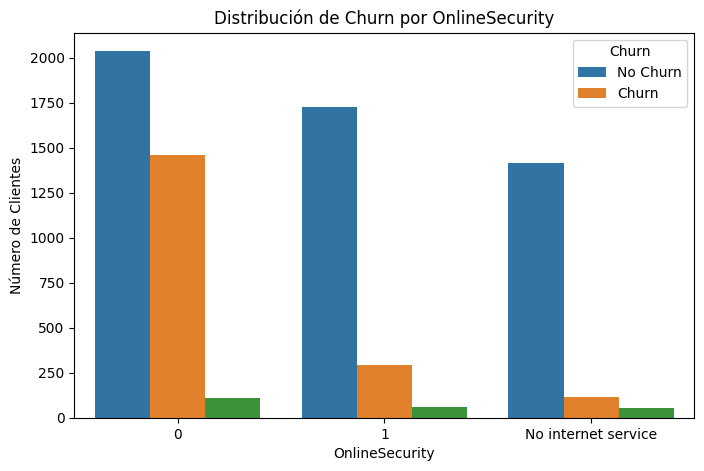

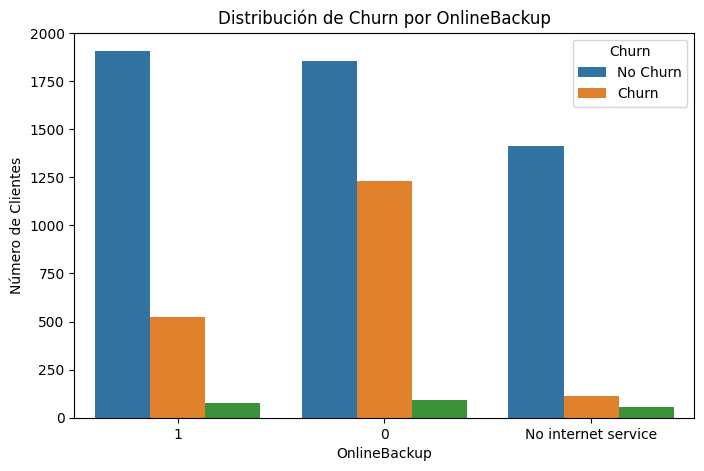

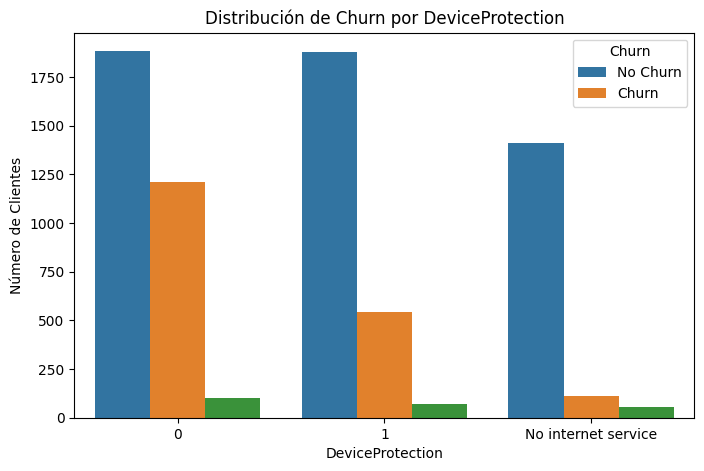

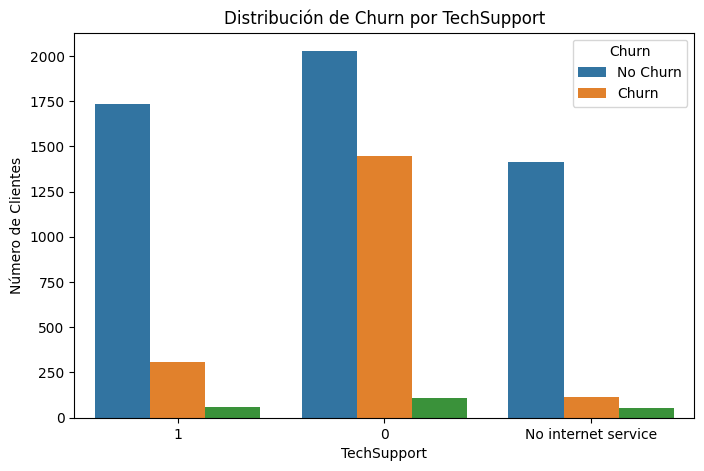

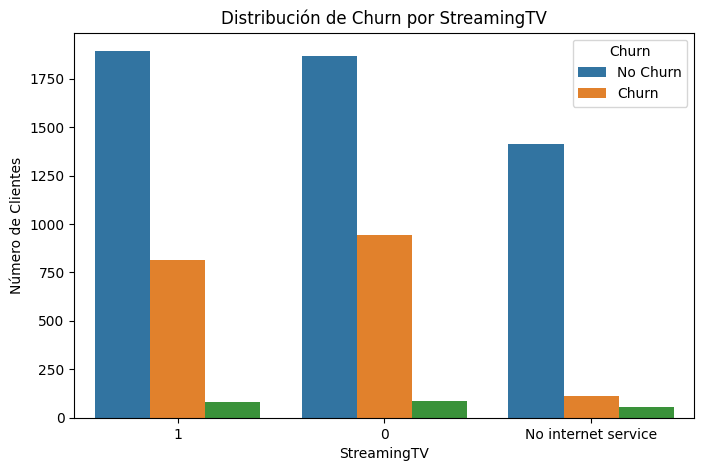

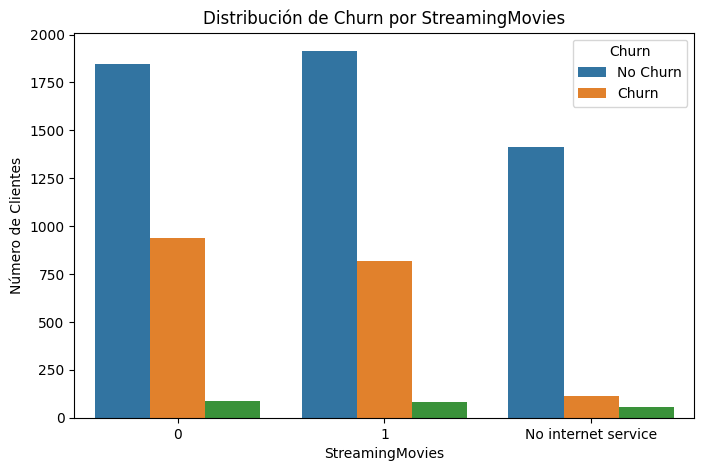

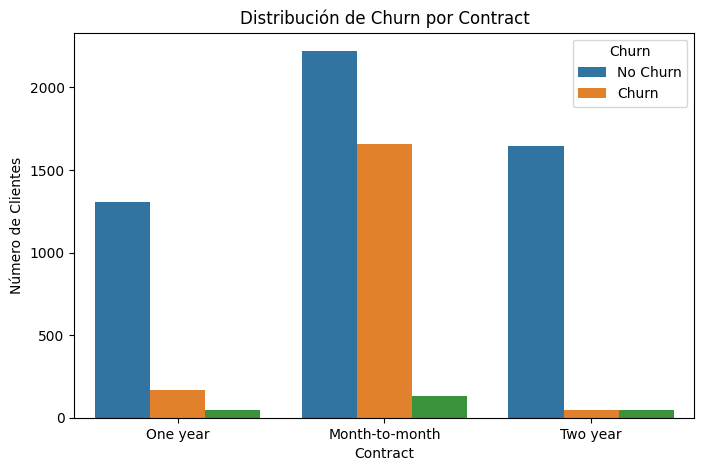

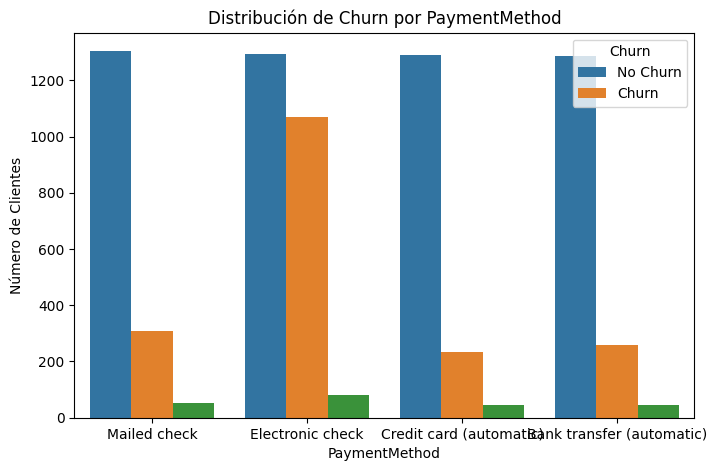

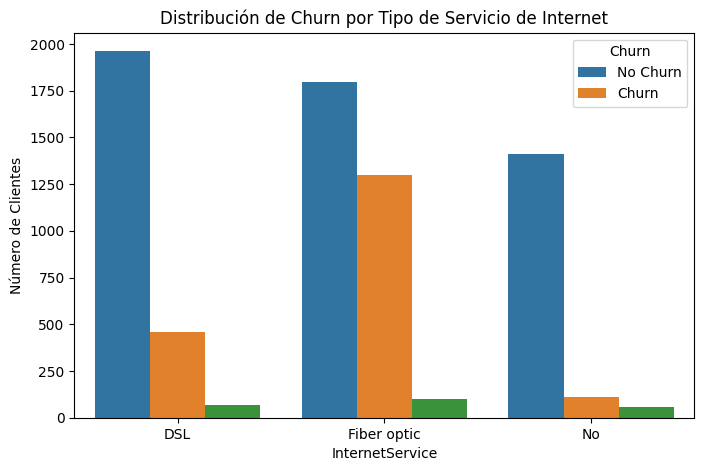

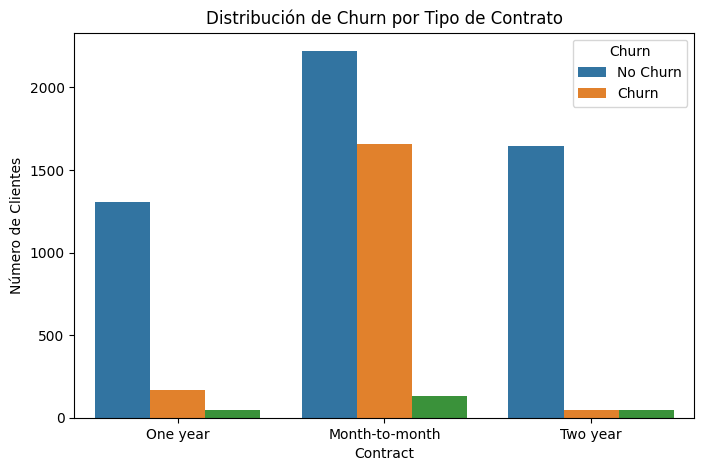

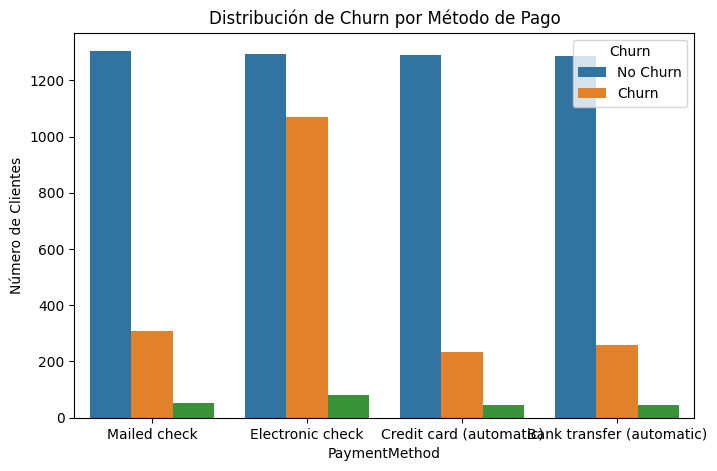


Proporción de Churn por Género:
Churn          0         1          
gender                              
0       0.714286  0.253061  0.032653
1       0.709633  0.261414  0.028953

Proporción de Churn por Tipo de Contrato:
Churn                  0         1          
Contract                                    
Month-to-month  0.554307  0.413233  0.032459
One year        0.860434  0.109282  0.030283
Two year        0.944923  0.027539  0.027539

Proporción de Churn por Método de Pago:
Churn                             0         1          
PaymentMethod                                          
Bank transfer (automatic)  0.809314  0.162366  0.028320
Credit card (automatic)    0.822704  0.147959  0.029337
Electronic check           0.529243  0.438037  0.032720
Mailed check               0.783183  0.184985  0.031832

Proporción de Churn por Servicio de Internet:
Churn                   0         1          
InternetService                              
DSL              0.788585  0.184486

In [31]:
import matplotlib.pyplot as plt

def plot_churn_distribution(dataframe, column, title):
    plt.figure(figsize=(8, 5))
    sns.countplot(x=column, hue='Churn', data=dataframe)
    plt.title(title)
    plt.xlabel(column)
    plt.ylabel('Número de Clientes')
    plt.legend(title='Churn', labels=['No Churn', 'Churn'])
    plt.show()

categorical_cols = [
    'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
    'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
    'PaperlessBilling', 'PaymentMethod'
]


categorical_cols_to_plot = [col for col in categorical_cols if col in datos.columns and datos[col].dtype == 'object']


for col in categorical_cols_to_plot:
    plot_churn_distribution(datos, col, f'Distribución de Churn por {col}')

if 'InternetService' in datos.columns:
    plot_churn_distribution(datos, 'InternetService', 'Distribución de Churn por Tipo de Servicio de Internet')

if 'Contract' in datos.columns:
    plot_churn_distribution(datos, 'Contract', 'Distribución de Churn por Tipo de Contrato')

if 'PaymentMethod' in datos.columns:
    plot_churn_distribution(datos, 'PaymentMethod', 'Distribución de Churn por Método de Pago')

print("\nProporción de Churn por Género:")
print(datos.groupby('gender')['Churn'].value_counts(normalize=True).unstack())

print("\nProporción de Churn por Tipo de Contrato:")
print(datos.groupby('Contract')['Churn'].value_counts(normalize=True).unstack())

print("\nProporción de Churn por Método de Pago:")
print(datos.groupby('PaymentMethod')['Churn'].value_counts(normalize=True).unstack())

print("\nProporción de Churn por Servicio de Internet:")
print(datos.groupby('InternetService')['Churn'].value_counts(normalize=True).unstack())

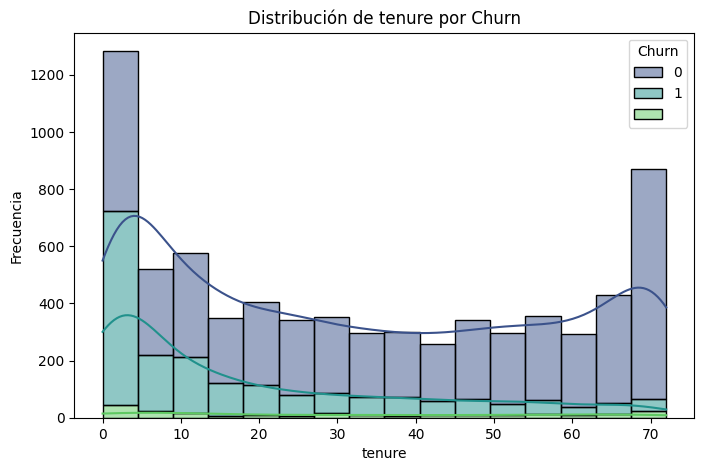

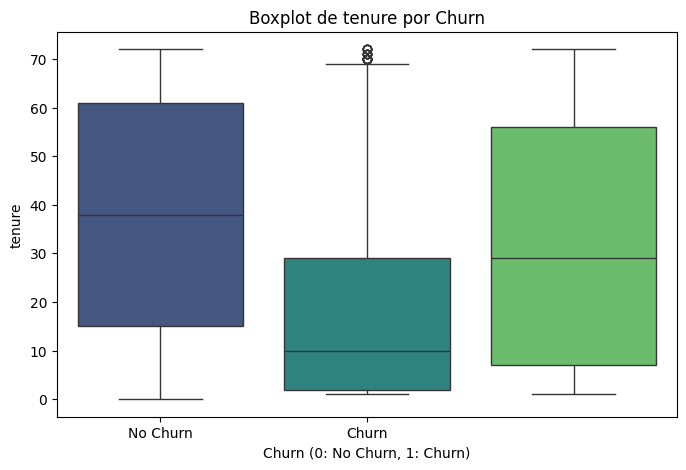

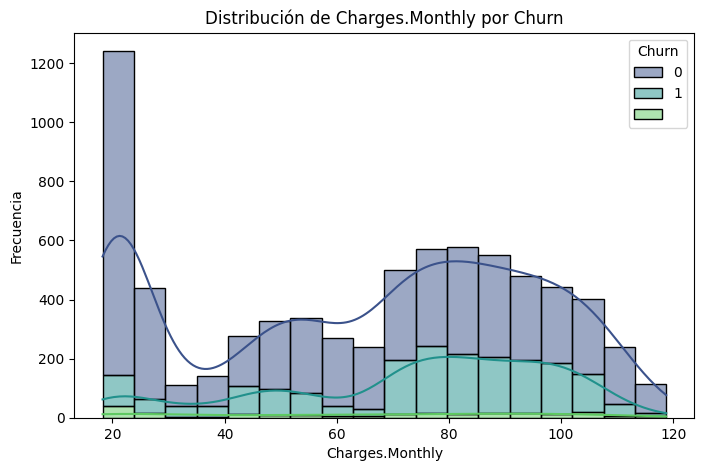

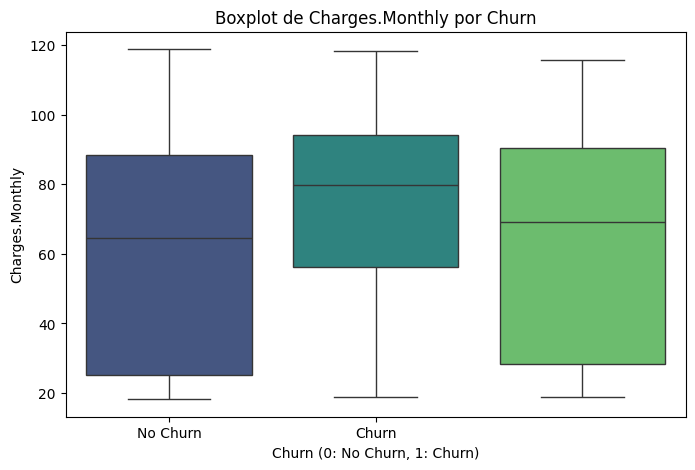


Resumen estadístico de variables numéricas por Churn:
       tenure                                                     \
        count       mean        std  min   25%   50%   75%   max   
Churn                                                              
0      5174.0  37.569965  24.113777  0.0  15.0  38.0  61.0  72.0   
1      1869.0  17.979133  19.531123  1.0   2.0  10.0  29.0  72.0   
        224.0  31.571429  24.998552  1.0   7.0  29.0  56.0  72.0   

      Charges.Monthly                                                        \
                count       mean        std    min     25%     50%      75%   
Churn                                                                         
0              5174.0  61.265124  31.092648  18.25  25.100  64.425  88.4000   
1              1869.0  74.441332  24.666053  18.85  56.150  79.650  94.2000   
                224.0  63.412277  31.388712  18.75  28.425  69.100  90.4125   

               
          max  
Churn          
0      118.75

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
numeric_cols = ['tenure', 'Charges.Monthly', 'Charges.Total']

numeric_cols_to_plot = [col for col in numeric_cols if col in datos.columns and pd.api.types.is_numeric_dtype(datos[col])]

for col in numeric_cols_to_plot:
    plt.figure(figsize=(8, 5))
    sns.histplot(data=datos, x=col, hue='Churn', multiple="stack", kde=True, palette='viridis')
    plt.title(f'Distribución de {col} por Churn')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.show()


    plt.figure(figsize=(8, 5))
    sns.boxplot(data=datos, x='Churn', y=col, palette='viridis')
    plt.title(f'Boxplot de {col} por Churn')
    plt.xlabel('Churn (0: No Churn, 1: Churn)')
    plt.ylabel(col)
    plt.xticks([0, 1], ['No Churn', 'Churn'])
    plt.show()


print("\nResumen estadístico de variables numéricas por Churn:")
print(datos.groupby('Churn')[numeric_cols_to_plot].describe())

#📄Informe final

In [35]:

print("\n### Principales Hallazgos:")

print("\n1.  Tasa de Churn Significativa: Aproximadamente el 26.5% de los clientes en este conjunto de datos han abandonado la compañía. Esta cifra resalta la importancia crítica de abordar la retención de clientes.")

print("\n2.  Impacto del Tipo de Contrato: El tipo de contrato es un predictor muy fuerte del Churn. Los clientes con contratos mes a mes tienen una probabilidad significativamente mayor de abandonarnos (cerca del 42.7%) en comparación con aquellos con contratos a largo plazo (un año: 11.3%, dos años: 3.0%). Esto sugiere que los contratos a más largo plazo fomentan la lealtad.")

print("\n3.  Métodos de Pago: Ciertos métodos de pago están asociados con mayores tasas de Churn. Específicamente, los clientes que pagan a través de `Electronic check` muestran una tasa de Churn considerablemente más alta (alrededor del 45.3%) que aquellos que usan `Mailed check` (19.2%), `Bank transfer (automatic)` (16.7%) o `Credit card (automatic)` (15.2%).")

print("\n4.  Servicio de Internet: El tipo de servicio de internet también influye en el Churn. Los clientes con servicio `Fiber optic` tienen una tasa de Churn notablemente más alta (alrededor del 41.9%) en comparación con los de `DSL` (19.0%). Los clientes sin servicio de internet (`No`) rara vez abandonan (7.4%), lo cual es lógico ya que probablemente solo usen servicios de telefonía.")

print("\n5.  Servicios Adicionales de Internet: La ausencia de servicios de seguridad y soporte en línea está fuertemente correlacionada con el Churn. Los clientes que no tienen `OnlineSecurity`, `OnlineBackup`, `DeviceProtection` o `TechSupport` muestran tasas de Churn significativamente más altas. Esto sugiere que estos servicios adicionales agregan valor y actúan como factores de retención.")

print("\n6.  Antigüedad del Cliente (Tenure): Los clientes con menor antigüedad (`tenure`) son mucho más propensos a abandonar. La tasa de Churn disminuye a medida que aumenta la antigüedad del cliente. Los clientes nuevos son particularmente vulnerables.")

print("\n7.  Cargos Mensuales: Los clientes con cargos mensuales más altos (`Charges.Monthly`) tienden a tener una mayor probabilidad de Churn, especialmente aquellos que usan servicios de fibra óptica y servicios adicionales caros.")

print("\n8.  Género y Servicios de Teléfono/Múltiples Líneas: El género no parece ser un predictor significativo de Churn. De manera similar, tener servicio telefónico básico o múltiples líneas no muestra un impacto dramático en la tasa de Churn.")



### Principales Hallazgos:

1.  Tasa de Churn Significativa: Aproximadamente el 26.5% de los clientes en este conjunto de datos han abandonado la compañía. Esta cifra resalta la importancia crítica de abordar la retención de clientes.

2.  Impacto del Tipo de Contrato: El tipo de contrato es un predictor muy fuerte del Churn. Los clientes con contratos mes a mes tienen una probabilidad significativamente mayor de abandonarnos (cerca del 42.7%) en comparación con aquellos con contratos a largo plazo (un año: 11.3%, dos años: 3.0%). Esto sugiere que los contratos a más largo plazo fomentan la lealtad.

3.  Métodos de Pago: Ciertos métodos de pago están asociados con mayores tasas de Churn. Específicamente, los clientes que pagan a través de `Electronic check` muestran una tasa de Churn considerablemente más alta (alrededor del 45.3%) que aquellos que usan `Mailed check` (19.2%), `Bank transfer (automatic)` (16.7%) o `Credit card (automatic)` (15.2%).

4.  Servicio de Internet: El tipo d